In [2]:
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import cmocean

In [74]:
def draw_auc(ds,ax):
    auc_data = pd.read_csv('../result/{}_papersig_prediction.csv'.format(ds))
    fpr, tpr, thresholds, auc = {}, {}, {}, {}
    cmdict = cmocean.tools.get_dict(cmocean.cm.matter, N=4)
    color = cmdict['green']
    plt.figure(figsize=(20,20))
    for i in dataset:
        if i == ds: continue
        fpr[i], tpr[i], thresholds[i]  = roc_curve(auc_data[auc_data['Dataset']==i]['label'].replace({1:0,2:1}),auc_data[auc_data['Dataset']==i]['prediction'])
        auc[i] = roc_auc_score(auc_data[auc_data['Dataset']==i]['label'].replace({1:0,2:1}),auc_data[auc_data['Dataset']==i]['prediction'])
        
#         ax.pcolormesh(Z, cmap='cmo.amp')
        ax.plot(fpr[i], tpr[i],
                 label=i+' ROC curve (area = {0:0.2f})'.format(auc[i]), 
                 color=color.pop(), linestyle='-.', linewidth=4)


    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set(xlabel='False Positive Rate', 
           ylabel='True Positive Rate',
           xlim=[-0.01, 1.01],
           ylim=[-0.01, 1.01],
           title=ds)

    ax.legend(loc="lower right", prop={'size': 14.3})
    
    plt.xlabel('round',{'size': 14.3})

In [66]:
dataset = ['GSE78220','GSE91061','MGSP','PRJEB23709']

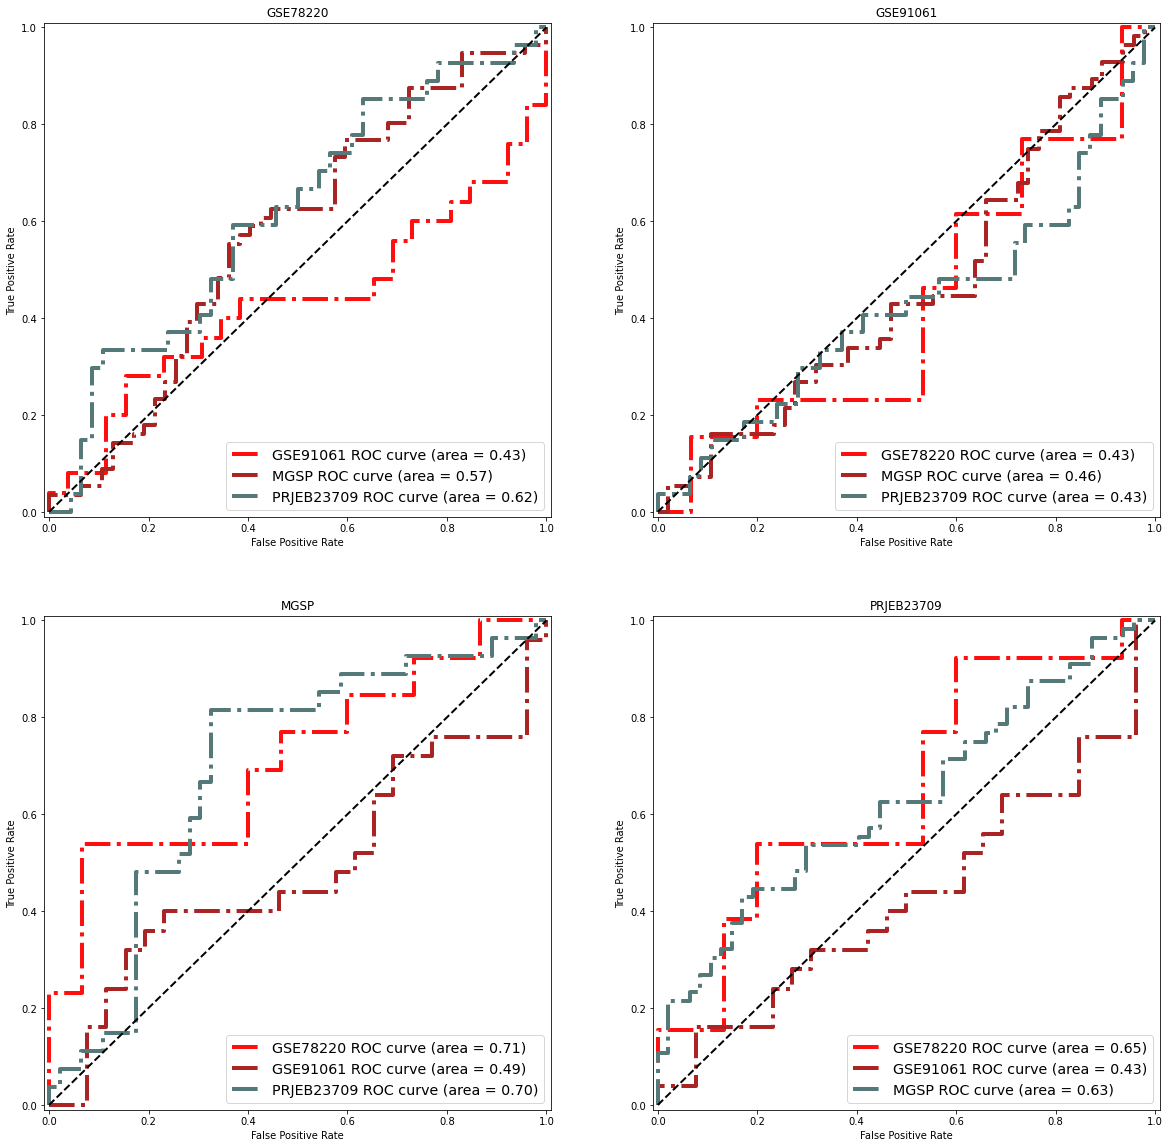

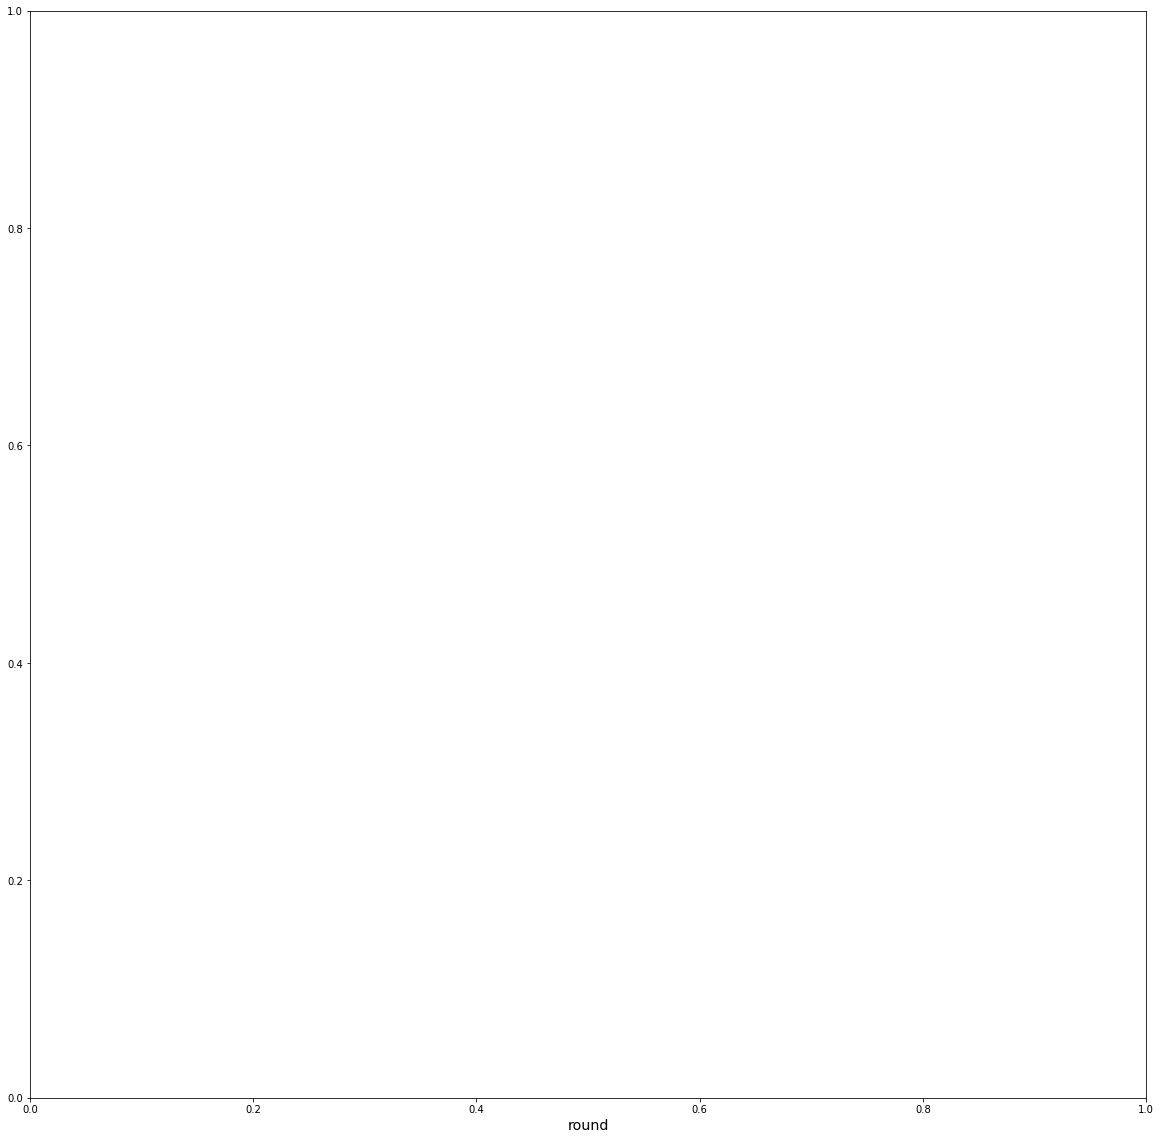

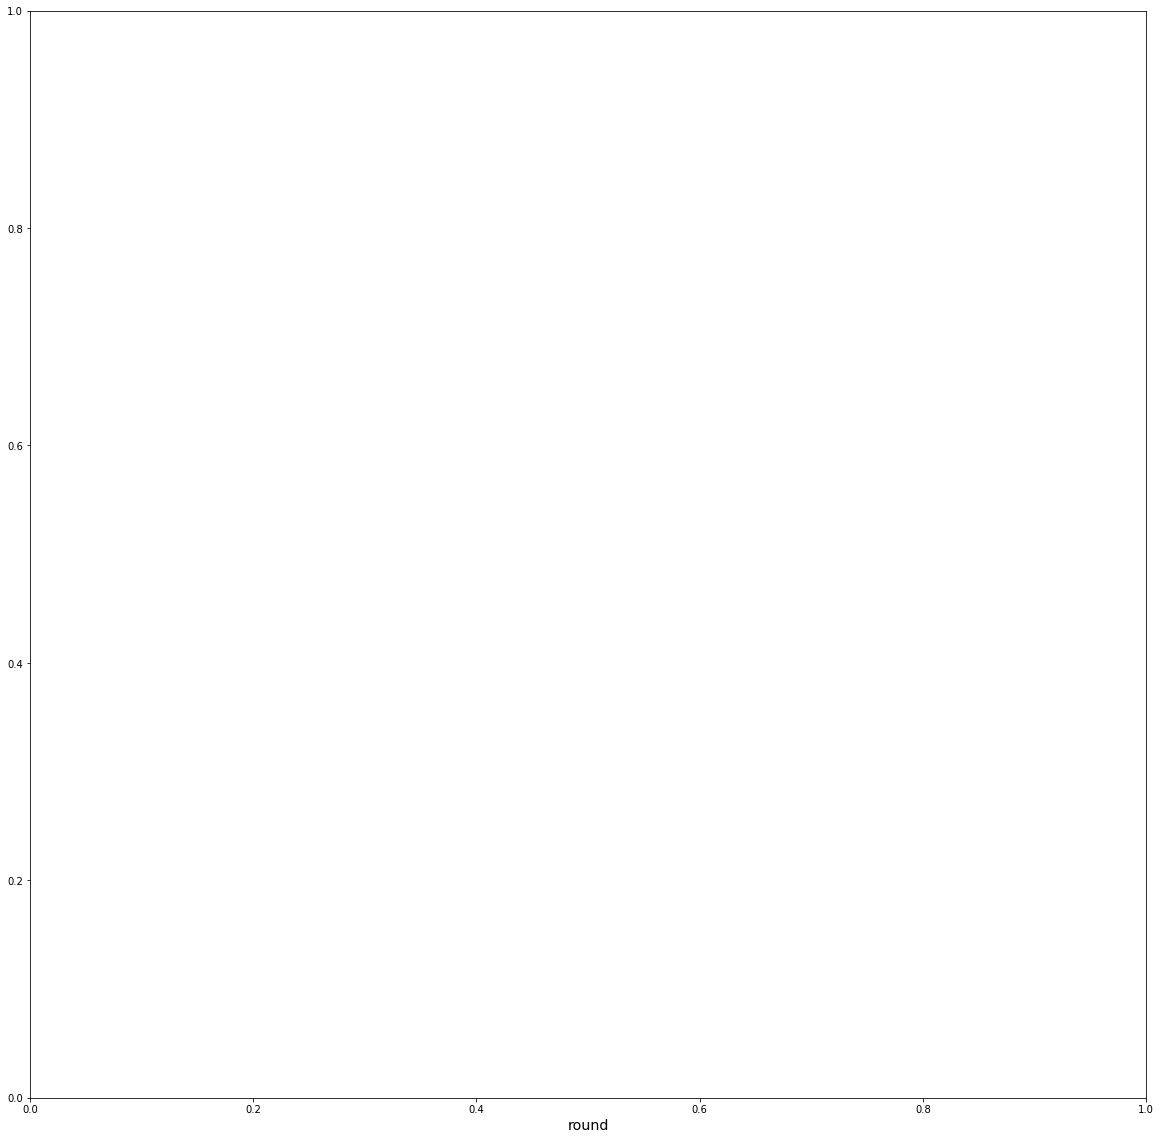

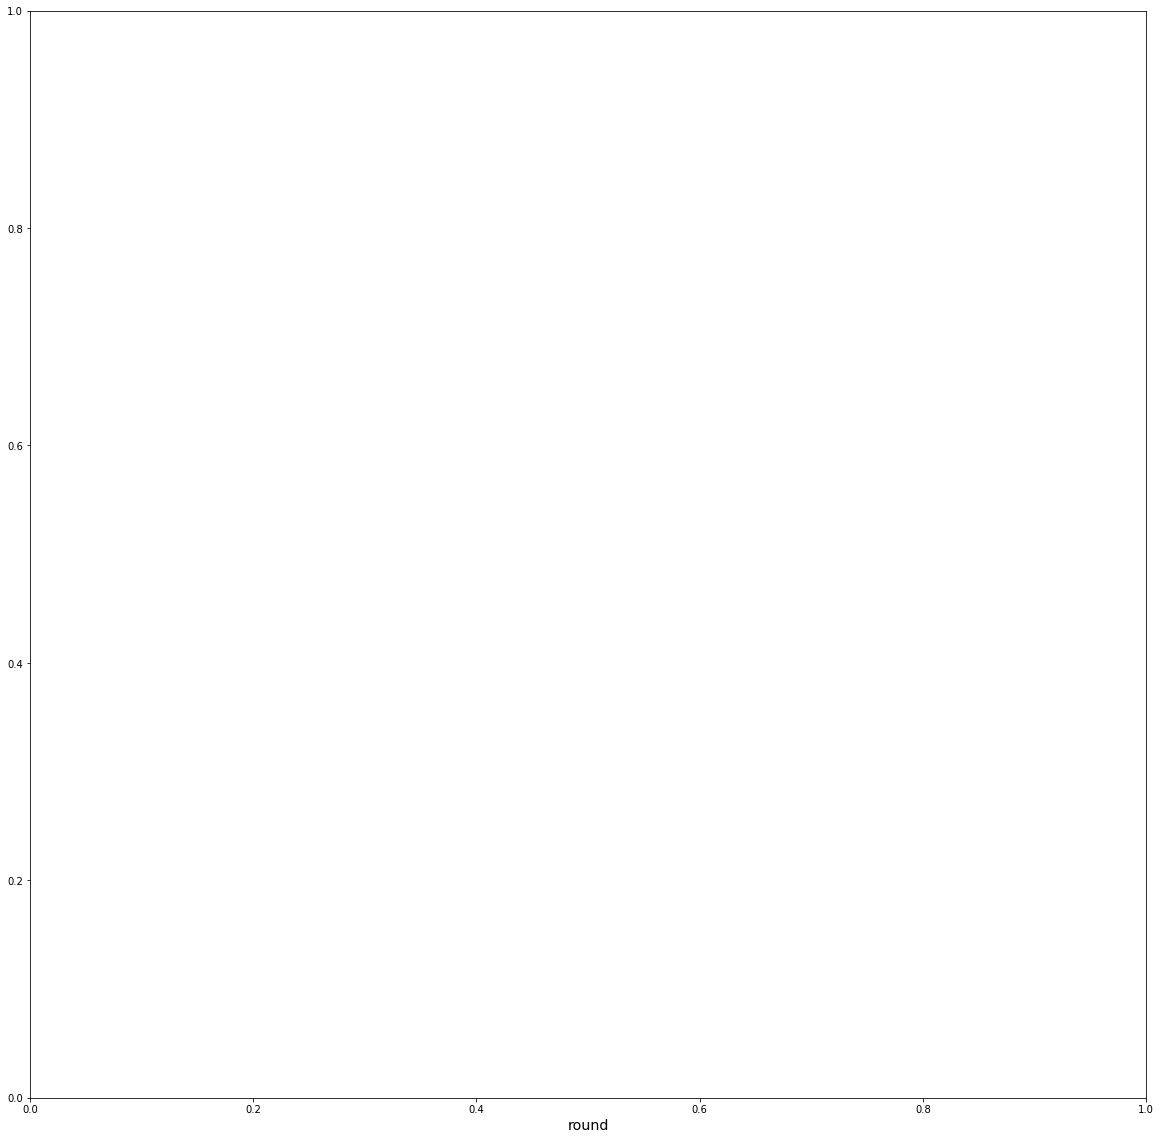

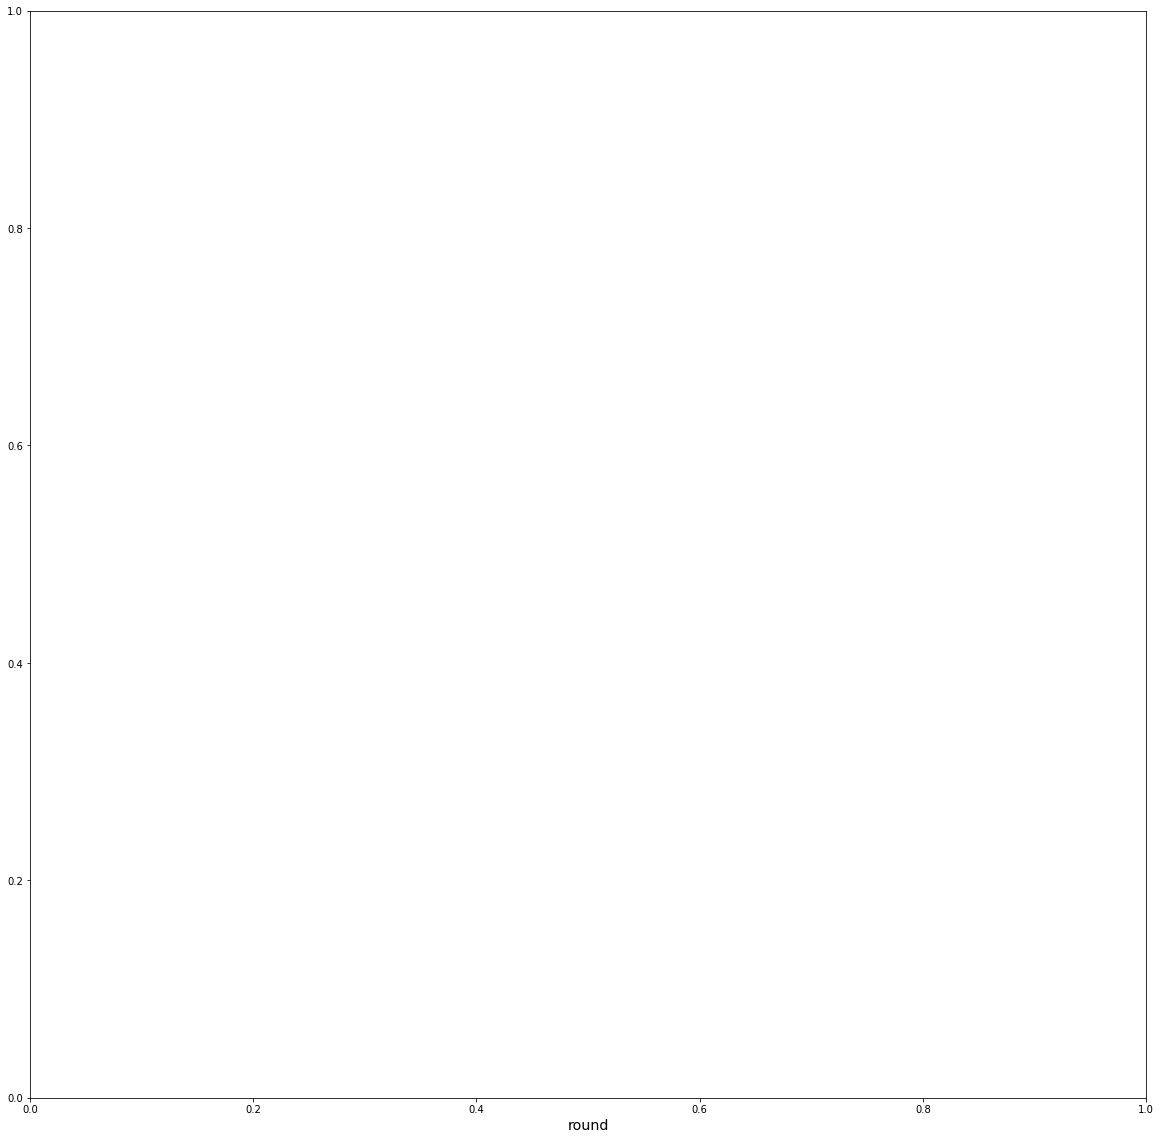

In [75]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,20))

for i in zip(dataset,[ax1, ax2,ax3,ax4]):
    draw_auc(*i)
    
_.savefig("../result/auc.pdf", bbox_inches='tight', dpi=400)